# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.    
matplotlib을 이용해 그래프에 대한 설정을 추가로 할 수 있다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- **kind** : 그래프 종류 지정
    - **'line'**: line plot (default)
    - **'bar'**: vertical bar plot
    - **'barh'**: horizontal bar plot
    - **'hist'**: histogram
    - **'box'**: boxplot
    - **'kde'**: Kernel Density Estimation plot
    - **'pie'**: pie plot
    - **'scatter'**: scatter plot

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다. ==> 라벨로 사용

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tips = pd.read_csv('data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


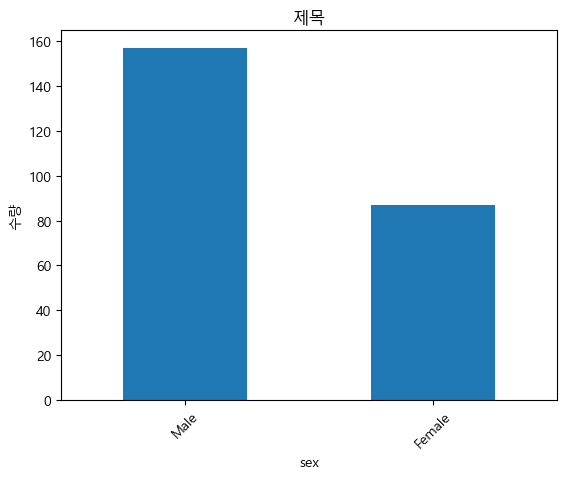

In [16]:
tips['sex'].value_counts().plot(kind='bar',
                                title = '제목',
                                ylabel= '수량',
                                rot = 45) # ; => Axes 리턴 , rot :x축 라벨 각도 default : 90
# plt.title('데이터 성별')
plt.show()

<Axes: xlabel='sex'>

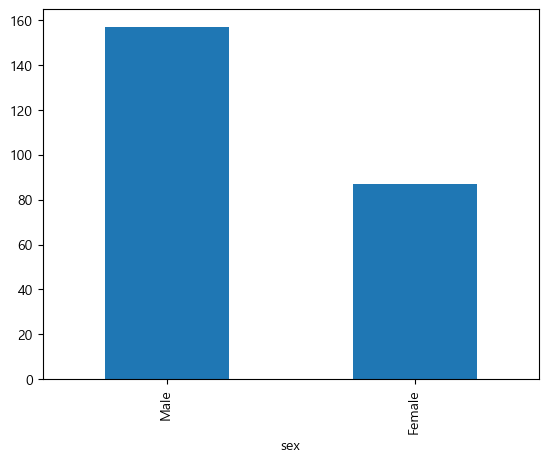

In [21]:
tips['sex'].value_counts().plot.bar()

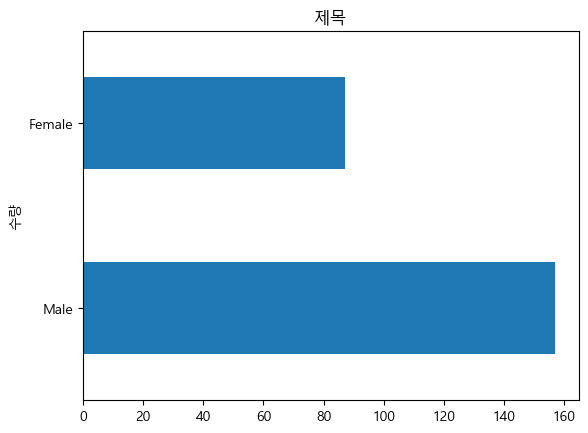

In [23]:
tips['sex'].value_counts().plot(kind='barh',
                                title = '제목',
                                ylabel= '수량',
                                rot = 0) # ; => Axes 리턴 , rot :x축 라벨 각도 default : 90
# plt.title('데이터 성별')
plt.show()

In [25]:
df = tips.pivot_table(index = 'sex',
                columns = 'smoker',
                values = 'tip',
                aggfunc = 'count')

In [26]:
df

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


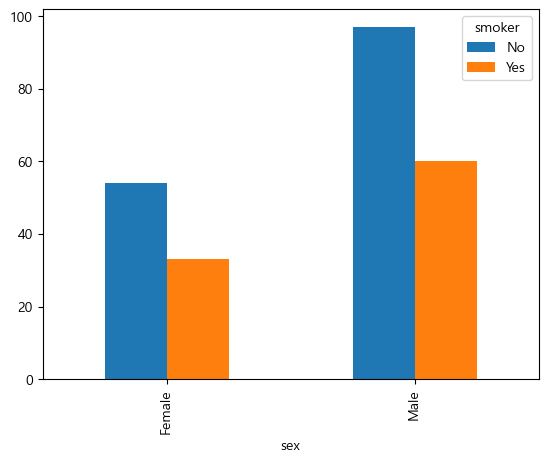

In [28]:
df.plot(kind = 'bar')
plt.show()

In [33]:
tips.pivot_table(index = 'sex',
               columns = 'day',
               values = 'tip',
               aggfunc = 'count')

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


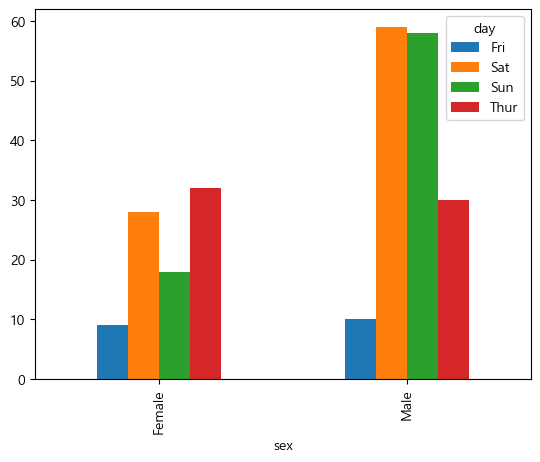

In [41]:
tips.pivot_table(index = 'sex',
               columns = 'day',
               values = 'tip',
               aggfunc = 'count').plot(kind='bar')

plt.show()

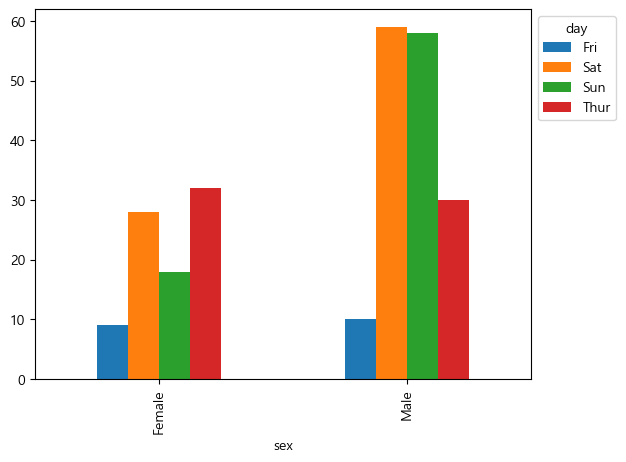

In [39]:
tips.pivot_table(index = 'sex',
               columns = 'day',
               values = 'tip',
               aggfunc = 'count').plot(kind='bar')
plt.legend(bbox_to_anchor = (1,1), loc ='upper left', title = 'day')
plt.show()

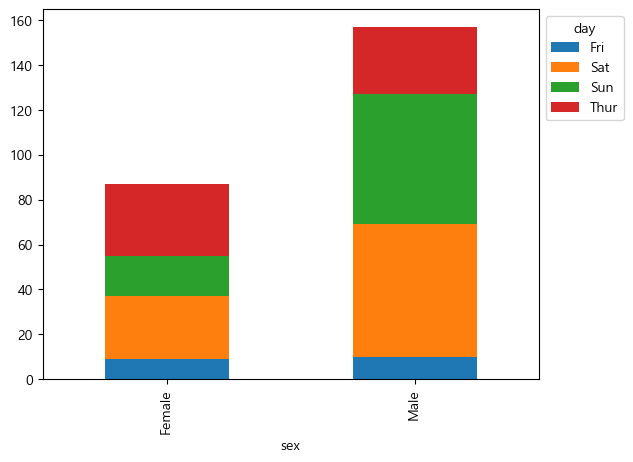

In [40]:
tips.pivot_table(index = 'sex',
               columns = 'day',
               values = 'tip',
               aggfunc = 'count').plot(kind='bar', stacked = True)
plt.legend(bbox_to_anchor = (1,1), loc ='upper left', title = 'day')
plt.show()

## 파이차트

In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [43]:
v = tips['day'].value_counts()
v

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

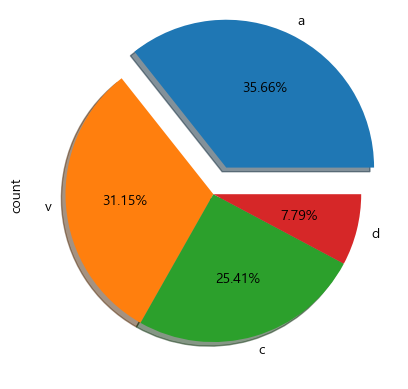

In [49]:
v.plot(kind='pie', autopct="%.2f%%", explode = [0.2,0,0,0], shadow = True, labels = list('avcde'))
plt.show()

## 히스토그램, KDE(밀도그래프)

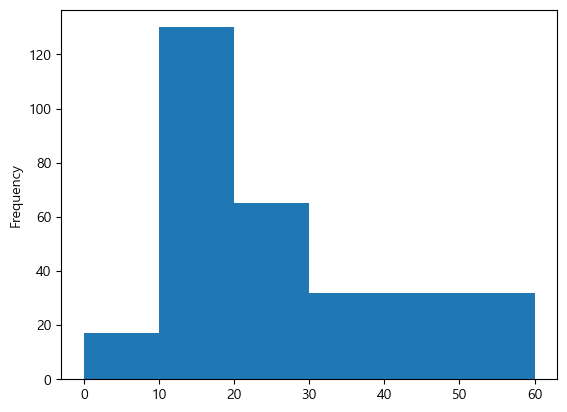

In [52]:
tips['total_bill'].plot(kind = 'hist',
#                        bins =30
                       bins =[0,10,20,30,60]   #4등분
                       )
plt.show()

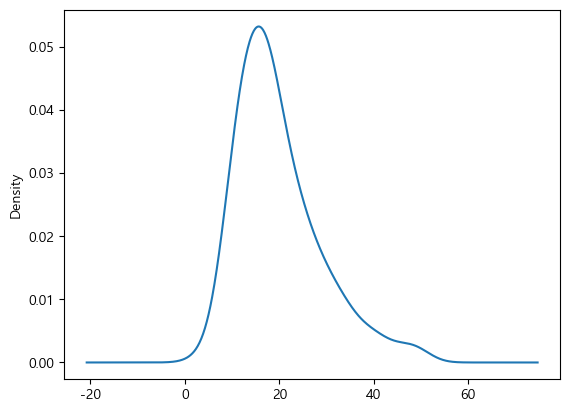

In [54]:
tips['total_bill'].plot(kind = 'kde')
plt.show()

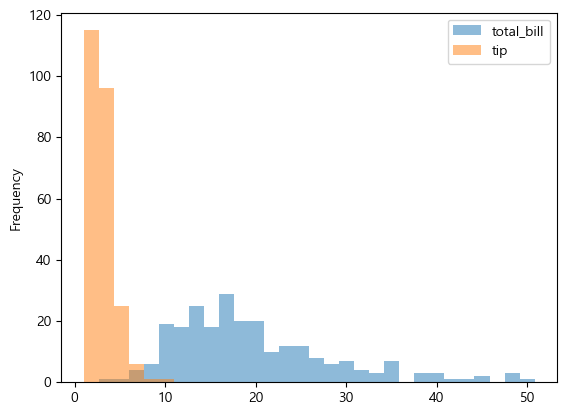

In [65]:
tips[['total_bill', 'tip']].plot(kind = 'hist', alpha = 0.5, bins = 30)
plt.show()

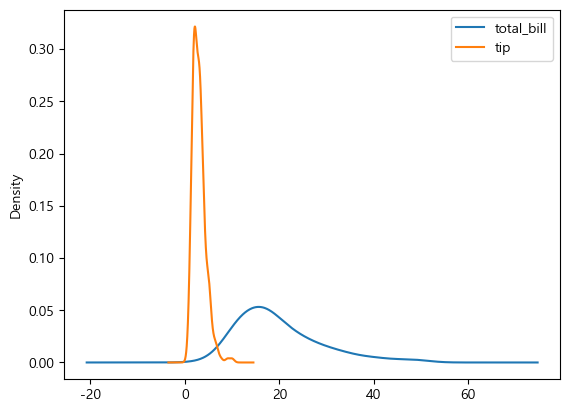

In [66]:
tips[['total_bill', 'tip']].plot(kind = 'kde')
plt.show()

## Boxplot (상자그래프)

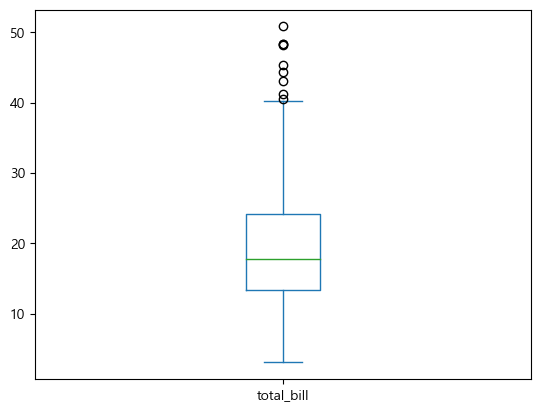

In [67]:
tips['total_bill'].plot(kind = 'box')
plt.show()

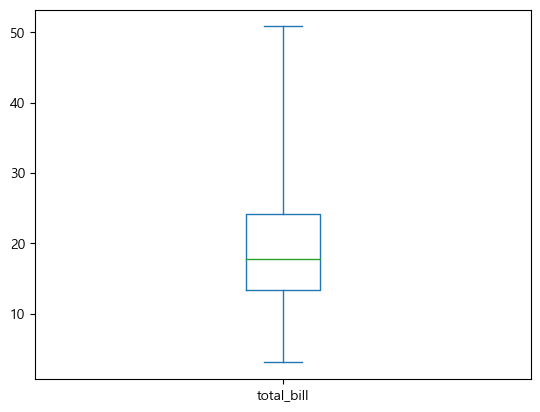

In [70]:
tips['total_bill'].plot(kind = 'box', whis = 3)
plt.show()

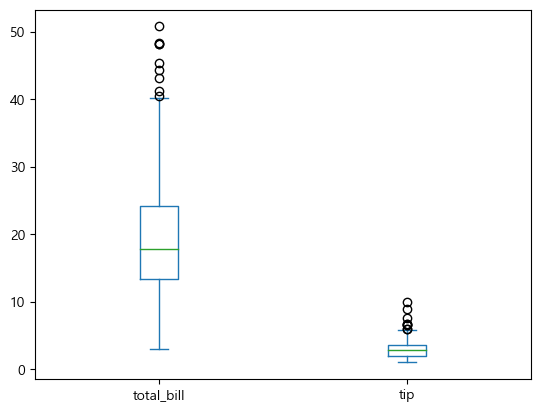

In [72]:
tips[['total_bill','tip']].plot(kind = 'box')
plt.show()

## scatter plot (산점도) 

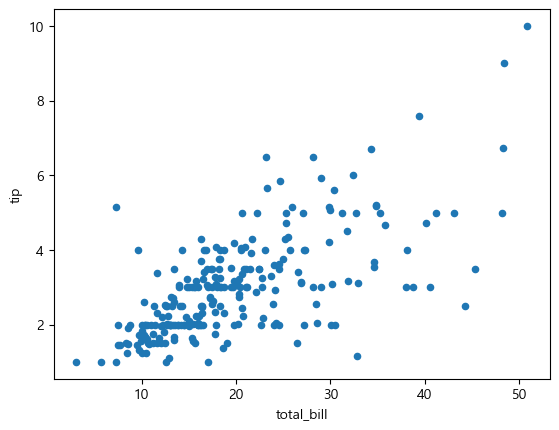

In [75]:
tips.plot(kind = 'scatter', x="total_bill", y = 'tip')  # scatter : 2개의 상관 관계
plt.show()

In [76]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [80]:
#lineplot
df = pd.read_excel('data/강수량.xlsx', index_col ='계절').T
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


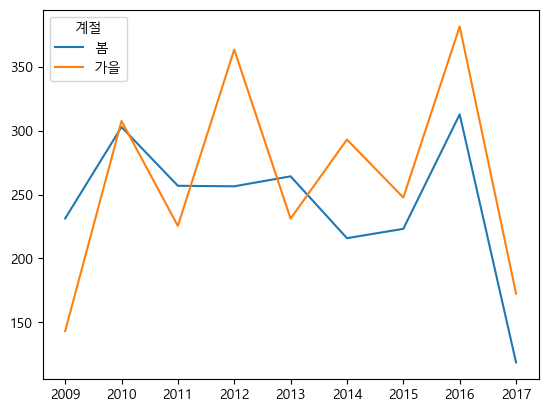

In [84]:
df[['봄', '가을']].plot()
plt.show()

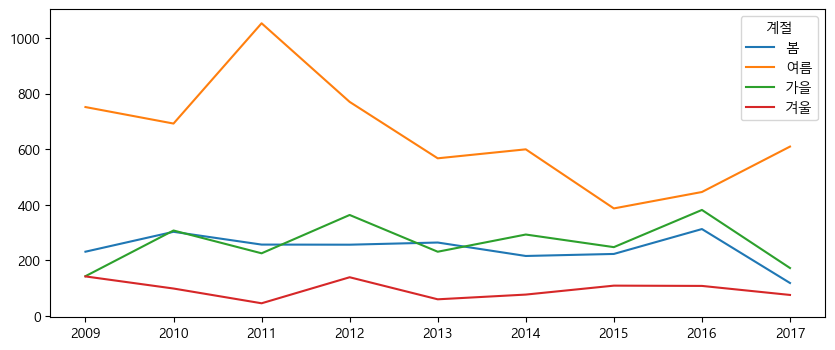

In [86]:
df.plot(figsize = (10,4))
plt.show()